In [589]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [590]:
train_data = pd.read_csv('credit_card_default_train.csv')
test_data = pd.read_csv('credit_card_default_test.csv')

In [591]:
cat_cols = ['Gender','EDUCATION_STATUS','MARITAL_STATUS','AGE','PAY_JULY','PAY_AUG','PAY_SEP','PAY_OCT','PAY_NOV','PAY_DEC']
target = 'NEXT_MONTH_DEFAULT'
ID = 'Client_ID'
num_cols = [col for col in train_data.columns.tolist() if col not in cat_cols +[target]+[ID]]

In [592]:
num_cols

['Balance_Limit_V1',
 'DUE_AMT_JULY',
 'DUE_AMT_AUG',
 'DUE_AMT_SEP',
 'DUE_AMT_OCT',
 'DUE_AMT_NOV',
 'DUE_AMT_DEC',
 'PAID_AMT_JULY',
 'PAID_AMT_AUG',
 'PAID_AMT_SEP',
 'PAID_AMT_OCT',
 'PAID_AMT_NOV',
 'PAID_AMT_DEC']

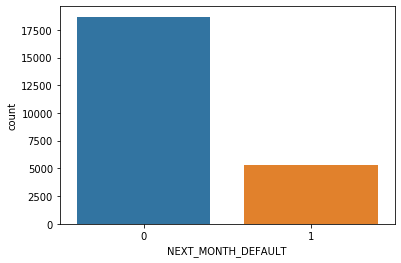

In [593]:
sns.countplot(x=target, data=train_data)

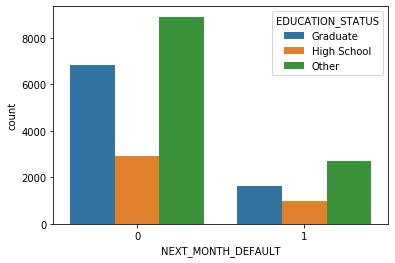

In [594]:
sns.countplot(x=target, data=train_data, hue ='EDUCATION_STATUS')

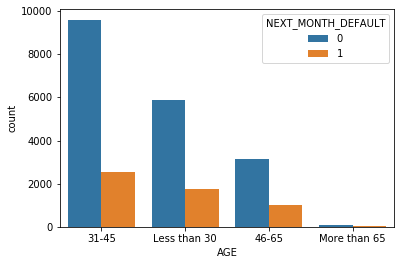

In [595]:
sns.countplot(x='AGE', data=train_data, hue =target)

In [571]:
sns.barplot(x = target, y ='PAID_DUE_JULY',data=train_data)

ValueError: Could not interpret input 'PAID_DUE_JULY'

In [515]:
def Paid_Due_Aug(row):
    if row['PAID_AMT_AUG'] == 0:
        val = row['DUE_AMT_AUG']
    else:
        val = row['DUE_AMT_AUG']/row['PAID_AMT_AUG']
    return val

In [516]:
def Paid_Due_July(row):
    if row['PAID_AMT_JULY'] == 0:
        val = row['DUE_AMT_JULY']
    else:
        val = row['DUE_AMT_JULY']/row['PAID_AMT_JULY']
    return val

In [517]:
train_data['PAID_DUE_JULY'] = train_data.apply(Paid_Due_July, axis=1)
train_data['PAID_DUE_AUG'] = train_data.apply(Paid_Due_Aug, axis=1)

In [596]:
train_data['PAY_TOT'] = train_data['PAY_JULY'] + train_data['PAY_AUG'] + train_data['PAY_SEP'] + train_data['PAY_OCT'] + train_data['PAY_NOV'] + train_data['PAY_DEC']

In [597]:
def isZero(row):
    if row['PAY_TOT'] == 0:
        val = 1
    else:
        val = 0
    return val

In [598]:
train_data['PAY_TOT_0'] = train_data.apply(isZero, axis=1)

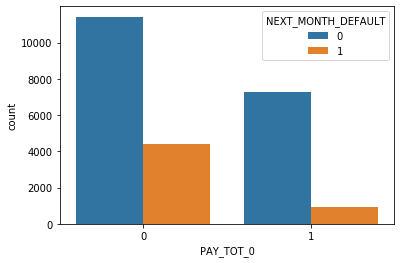

In [599]:
sns.countplot(x = 'PAY_TOT_0',data=train_data,hue=target)

In [600]:
train_data.head()

,Client_ID,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,...,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,NEXT_MONTH_DEFAULT,PAY_TOT,PAY_TOT_0
0,A2,1M,M,Graduate,Other,31-45,-1,-1,-1,-1,...,-13982,3437,6004,39418,162772,0,538165,0,-6,0
1,A3,1M,F,High School,Other,Less than 30,0,-1,-1,-1,...,124590,151818,46200,43530,80811,942,33666,0,-4,0
2,A4,100K,F,High School,Single,31-45,4,3,2,2,...,0,0,0,0,0,0,0,1,7,0
3,A5,200K,F,Graduate,Single,31-45,2,0,0,0,...,102740,3855,3890,3696,4620,4049,3918,1,2,0
4,A6,1M,F,Graduate,Other,31-45,2,2,0,0,...,453899,0,20790,16170,17325,16401,17325,0,4,0


In [601]:
LabelEncoder = LabelEncoder()
train_data['Balance_Limit_V1_cat'] = LabelEncoder.fit_transform(train_data['Balance_Limit_V1'])
train_data['Gender_cat'] = LabelEncoder.fit_transform(train_data['Gender'])
train_data['EDUCATION_STATUS_cat'] = LabelEncoder.fit_transform(train_data['EDUCATION_STATUS'])
train_data['MARITAL_STATUS_cat'] = LabelEncoder.fit_transform(train_data['MARITAL_STATUS'])
train_data['AGE_cat'] = LabelEncoder.fit_transform(train_data['AGE'])

In [602]:
train_data.head()

,Client_ID,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,...,PAID_AMT_NOV,PAID_AMT_DEC,NEXT_MONTH_DEFAULT,PAY_TOT,PAY_TOT_0,Balance_Limit_V1_cat,Gender_cat,EDUCATION_STATUS_cat,MARITAL_STATUS_cat,AGE_cat
0,A2,1M,M,Graduate,Other,31-45,-1,-1,-1,-1,...,0,538165,0,-6,0,3,1,0,0,0
1,A3,1M,F,High School,Other,Less than 30,0,-1,-1,-1,...,942,33666,0,-4,0,3,0,1,0,2
2,A4,100K,F,High School,Single,31-45,4,3,2,2,...,0,0,1,7,0,2,0,1,1,0
3,A5,200K,F,Graduate,Single,31-45,2,0,0,0,...,4049,3918,1,2,0,5,0,0,1,0
4,A6,1M,F,Graduate,Other,31-45,2,2,0,0,...,16401,17325,0,4,0,3,0,0,0,0


In [603]:
X_train, X_test, y_train, y_test = train_test_split(train_data.drop([target,ID,'Balance_Limit_V1','Gender','EDUCATION_STATUS','MARITAL_STATUS','AGE'],axis=1), 
                                                    train_data[target], test_size=0.30)

In [604]:
X_train

,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,DUE_AMT_OCT,...,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,PAY_TOT,PAY_TOT_0,Balance_Limit_V1_cat,Gender_cat,EDUCATION_STATUS_cat,MARITAL_STATUS_cat,AGE_cat
14273,-1,-1,-1,-1,-1,-1,44733,4454,11270,26912,...,29138,18300,16124,-6,0,3,0,0,0,2
10025,-2,-2,-2,-2,-2,-2,1460,730,730,730,...,730,730,730,-12,0,3,1,1,1,1
9874,-2,-2,-2,-2,-2,-2,28912,12862,14105,10065,...,0,0,0,-12,0,7,1,0,0,0
5216,0,0,0,0,0,-1,8124,7570,26184,21578,...,0,8298,9034,-1,0,5,1,0,0,2
11506,-1,-1,-1,-1,0,-1,2215,4384,1964,14761,...,12,3137,467,-5,0,7,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7940,1,-2,-1,2,0,0,71495,76431,99180,65479,...,4622,6930,6937,0,1,5,1,1,1,1
638,0,0,0,0,-1,-1,68711,37674,12093,7212,...,26440,4421,15475,-2,0,2,0,2,0,2
20223,0,0,0,0,0,-2,423922,414724,310861,141950,...,0,0,0,-2,0,0,1,0,0,2
18490,0,0,0,0,0,0,57942,58314,60721,61118,...,2310,5410,2310,0,1,2,1,2,1,0


In [608]:
#param_grid = {'bootstrap': [True, False],
# 'max_features': ['auto', 'sqrt'],
# 'n_estimators': [100,150,200]}
model = RandomForestClassifier(n_estimators=400,criterion='gini',max_features ='auto',bootstrap=True,max_depth=100,warm_start=True)
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=True)

In [609]:
preds = model.predict(X_test)

In [610]:
print(classification_report(y_test,preds))
print ('\n')
print(confusion_matrix(y_test,preds))

              precision    recall  f1-score   support

           0       0.84      0.94      0.88      5603
           1       0.62      0.37      0.47      1597

    accuracy                           0.81      7200
   macro avg       0.73      0.65      0.68      7200
weighted avg       0.79      0.81      0.79      7200



[[5239  364]
 [1001  596]]
